# Prepare test  satellite images 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

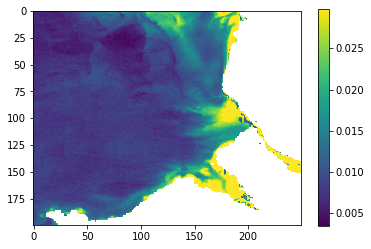

In [58]:
# prepare test dataset
polymer = xr.open_dataset(
    Path.home() / 
    Path('Documents/temp/ForelUle/polymer/S3A_OL_1_EFR____20200506T104005_20200506T104305_20200507T143731_0179_058_051_1980_LN1_O_NT_002.SEN3.nc')
)

# Restrict to Liverpool Bay
polymer = polymer.isel(height=slice(3200,3400),width=slice(2400,2650))

# Swir bands not useful for water classification
polymer = polymer.drop(['Rnir','Rgli','logchl','bbs','Rw865','Rw1020'])

plt.imshow(polymer['Rw560'],vmax=polymer['Rw560'].quantile(0.95))
plt.colorbar()

#Save to new netcdf file 
polymer.to_netcdf('data/S3A_OL_20200506T104005_20200506T104305_20200507T143731_0179_058_051_1980_LN1_O_NT_002.polymer.LivBay.nc')

C:\Users\tams00\AppData\Local\mambaforge\envs\gitm-utils\lib\site-packages\ipykernel_launcher.py:14: SerializationWarning: saving variable latitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  
C:\Users\tams00\AppData\Local\mambaforge\envs\gitm-utils\lib\site-packages\ipykernel_launcher.py:14: SerializationWarning: saving variable longitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  


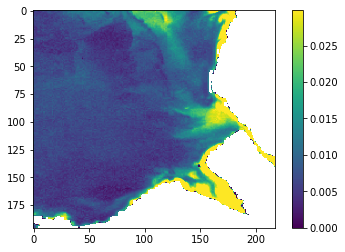

In [57]:
l2 = xr.open_dataset( 
    Path.home() / 
    Path('Documents/temp/ForelUle/subset_2_of_S3A_OL_2_WFR____20200506T104005_20200506T104305_20200507T211159_0179_058_051_1980_MAR_O_NT_002_resampled.nc')
)

#remove unwanted variables
for var in l2:
    if not var.endswith('reflectance') and not (var in ['latitude','longitude']):
        l2 = l2.drop(var)
        
plt.imshow(l2['Oa06_reflectance'],vmin=0,vmax=l2['Oa06_reflectance'].quantile(0.95))
plt.colorbar()        

l2.to_netcdf('data/S3A_OL_2_WFR____20200506T104005_20200506T104305_20200507T211159_0179_058_051_1980_MAR_O_NT_002.LivBay.nc')